AdaBoost Evaluation Metrics:
      Metric     Score
0   Accuracy   95.9500
1  Precision  100.0000
2     Recall   92.1100
3   F1 Score   95.8900
4        MCC   92.2064


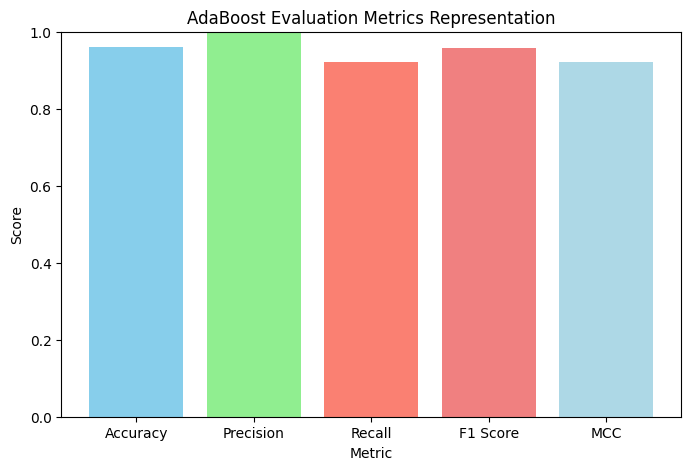

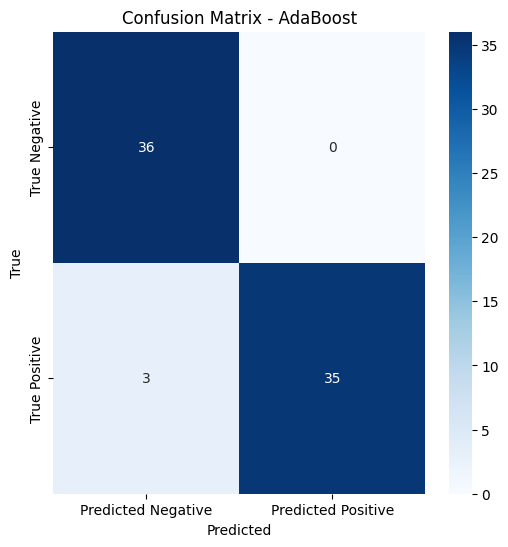

In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV for AdaBoost
grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='f1_macro', verbose=0)
grid_ada.fit(X_train, y_train)

# Best model
best_ada = grid_ada.best_estimator_

# Predictions
y_pred_ada = best_ada.predict(X_test)

# Evaluation Metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='binary')
recall_ada = recall_score(y_test, y_pred_ada, average='binary')
f1_ada = f1_score(y_test, y_pred_ada, average='binary')
mcc_ada = matthews_corrcoef(y_test, y_pred_ada)

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Display results in table
results_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_ada * 100, 2), round(precision_ada * 100, 2), round(recall_ada * 100, 2), round(f1_ada * 100, 2), round(mcc_ada*100, 4)]
})

print("AdaBoost Evaluation Metrics:")
print(results_ada)

# Bar chart
metrics_ada = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_ada = results_ada['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_ada, scores_ada, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('AdaBoost Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - AdaBoost')
plt.savefig("confusion_matrix_AdaBoost.png", dpi=300)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Random Forest Evaluation Metrics:
      Metric    Score
0   Accuracy  97.3000
1  Precision  97.3700
2     Recall  97.3700
3   F1 Score  97.3700
4        MCC  94.5906


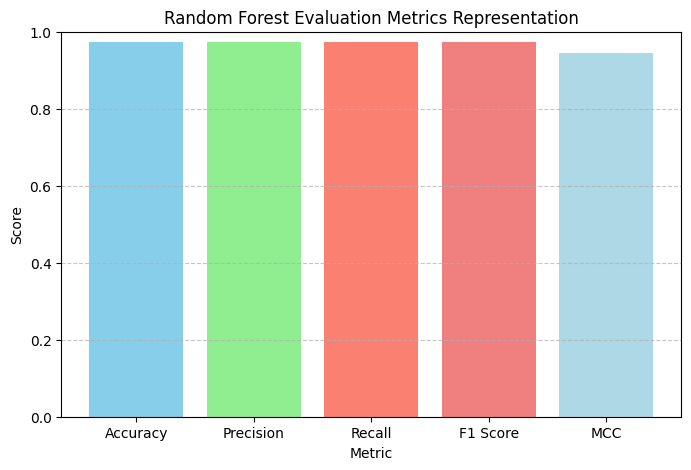

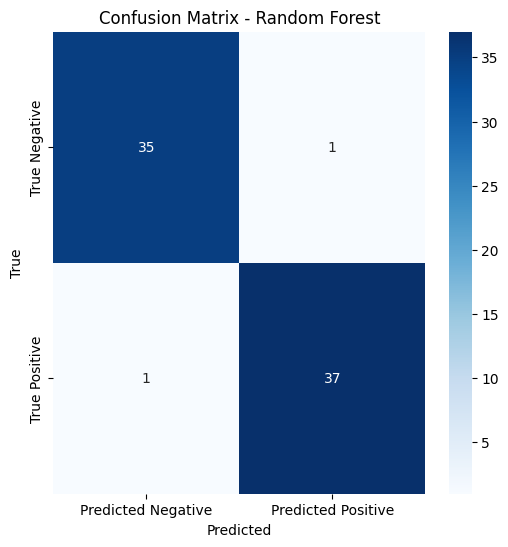

In [3]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)


# 2. Load and preprocess
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# 3. Hyperparameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# 4. GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_macro', verbose=0)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# 5. Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Results Table
results_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_rf * 100, 2), round(precision_rf * 100, 2),
              round(recall_rf * 100, 2), round(f1_rf * 100, 2), round(mcc_rf * 100, 4)]
})

print("Random Forest Evaluation Metrics:")
print(results_rf)

# Bar Chart
metrics_rf = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_rf = results_rf['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_rf, scores_rf, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Random Forest Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')

plt.savefig("confusion_matrix_RandomForest.png", dpi=300)

plt.show()
